# Clasificación Supervisada - Random Forest

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import pandas as pd
import rasterio
from sklearn.model_selection import train_test_split
from rasterio.plot import show_hist, show
import fiona
from rasterio.tools.mask import mask
from pandas.util.testing import assert_frame_equal
from rasterio import Affine
import geopandas as gpd
pd.options.mode.use_inf_as_na = True
from osgeo import gdal


Cargando dataset con información

In [7]:
dataset = pd.read_csv('/Users/oscar/Code/Maestria/perc_remota/taller_3/datasets/dos.csv', index_col=0).drop(['elevation'], axis=1)
dataset = dataset.fillna(0)

/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:466: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Cargando polígonos de entrenamiento

In [8]:
class_1 = pd.read_csv('/Users/oscar/Code/Maestria/perc_remota/taller_3/datasets/1.csv', index_col=0).drop(['elevation'], axis=1).fillna(0)
class_2 = pd.read_csv('/Users/oscar/Code/Maestria/perc_remota/taller_3/datasets/2.csv', index_col=0).drop(['elevation'], axis=1).fillna(0)
class_3 = pd.read_csv('/Users/oscar/Code/Maestria/perc_remota/taller_3/datasets/3.csv', index_col=0).drop(['elevation'], axis=1).fillna(0)
class_4 = pd.read_csv('/Users/oscar/Code/Maestria/perc_remota/taller_3/datasets/4.csv', index_col=0).drop(['elevation'], axis=1).fillna(0)
class_5 = pd.read_csv('/Users/oscar/Code/Maestria/perc_remota/taller_3/datasets/5.csv', index_col=0).drop(['elevation'], axis=1).fillna(0)
class_6 = pd.read_csv('/Users/oscar/Code/Maestria/perc_remota/taller_3/datasets/6.csv', index_col=0).drop(['elevation'], axis=1).fillna(0)
class_7 = pd.read_csv('/Users/oscar/Code/Maestria/perc_remota/taller_3/datasets/7.csv', index_col=0).drop(['elevation'], axis=1).fillna(0)
class_1 = class_1[class_1['ndvi']!=0]
class_2 = class_2[class_2['ndvi']!=0]
class_3 = class_3[class_3['ndvi']!=0]
class_4 = class_4[class_4['ndvi']!=0]
class_5 = class_5[class_5['ndvi']!=0]
class_6 = class_6[class_6['ndvi']!=0]
class_7 = class_7[class_7['ndvi']!=0]

/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:466: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Muestreando datos de entrenamiento y datos de prueba

In [9]:
no_data_class = dataset[(dataset['ndvi']==0)]
no_data_class['class'] = 0
test_size = 0.5
class_1_train, class_1_test = train_test_split(class_1, test_size=test_size)
class_2_train, class_2_test = train_test_split(class_2, test_size=test_size)
class_3_train, class_3_test = train_test_split(class_3, test_size=test_size)
class_4_train, class_4_test = train_test_split(class_4, test_size=test_size)
class_5_train, class_5_test = train_test_split(class_5, test_size=test_size)
class_6_train, class_6_test = train_test_split(class_6, test_size=test_size)
class_7_train, class_7_test = train_test_split(class_7, test_size=test_size)
no_data_train, no_data_test = train_test_split(no_data_class, test_size=test_size)
train_data = pd.concat([
    class_1_train,
    class_2_train,
    class_3_train,
    class_4_train,
    class_5_train,
    class_6_train,
    class_7_train,
    no_data_train],
    ignore_index=True
)
test_data  = pd.concat([
    class_1_test,
    class_2_test,
    class_3_test,
    class_4_test,
    class_5_test,
    class_6_test,
    class_7_test,
    no_data_test], 
    ignore_index=True
)

train_labels = train_data['class'].as_matrix()
train_data = train_data.drop(['class'], axis=1).as_matrix()

test_labels = test_data['class'].as_matrix()
test_data = test_data.drop(['class'], axis=1).as_matrix()


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
rf = RandomForestClassifier(n_estimators=500, oob_score=True)
rf = rf.fit(train_data, train_labels)


In [13]:
accuracy = rf.score(test_data, test_labels)
print('Our OOB prediction of accuracy is: {oob}%'.format(oob=accuracy))


Our OOB prediction of accuracy is: 0.9405284931654332%


In [14]:
df = pd.DataFrame()
df['truth'] = test_labels
df['predict'] = rf.predict(test_data)
print(pd.crosstab(df['truth'], df['predict'], margins=True))

predict        0     1      2       3       4       5      6      7      All
truth                                                                       
0        4414608     0      0       0       0       0      0      0  4414608
1              0  2986      3       0       8       2      9      0     3008
2              0     1  70503   11274   14261    5019    372    471   101901
3              0     0   6638  158481   47640    3130     30     62   215981
4              0     9   7218   65665  161141   34797   2275   6895   278000
5              0     2   5701    6191   41890   68371   3663  11483   137301
6              0    16    374      49    1968    4049  50586   1307    58349
7              0     0    761     224    8005   20036   1154  17845    48025
All      4414608  3014  91198  241884  274913  135404  58089  38063  5257173


In [15]:
predict_data = dataset.as_matrix()
clasification = rf.predict(predict_data)

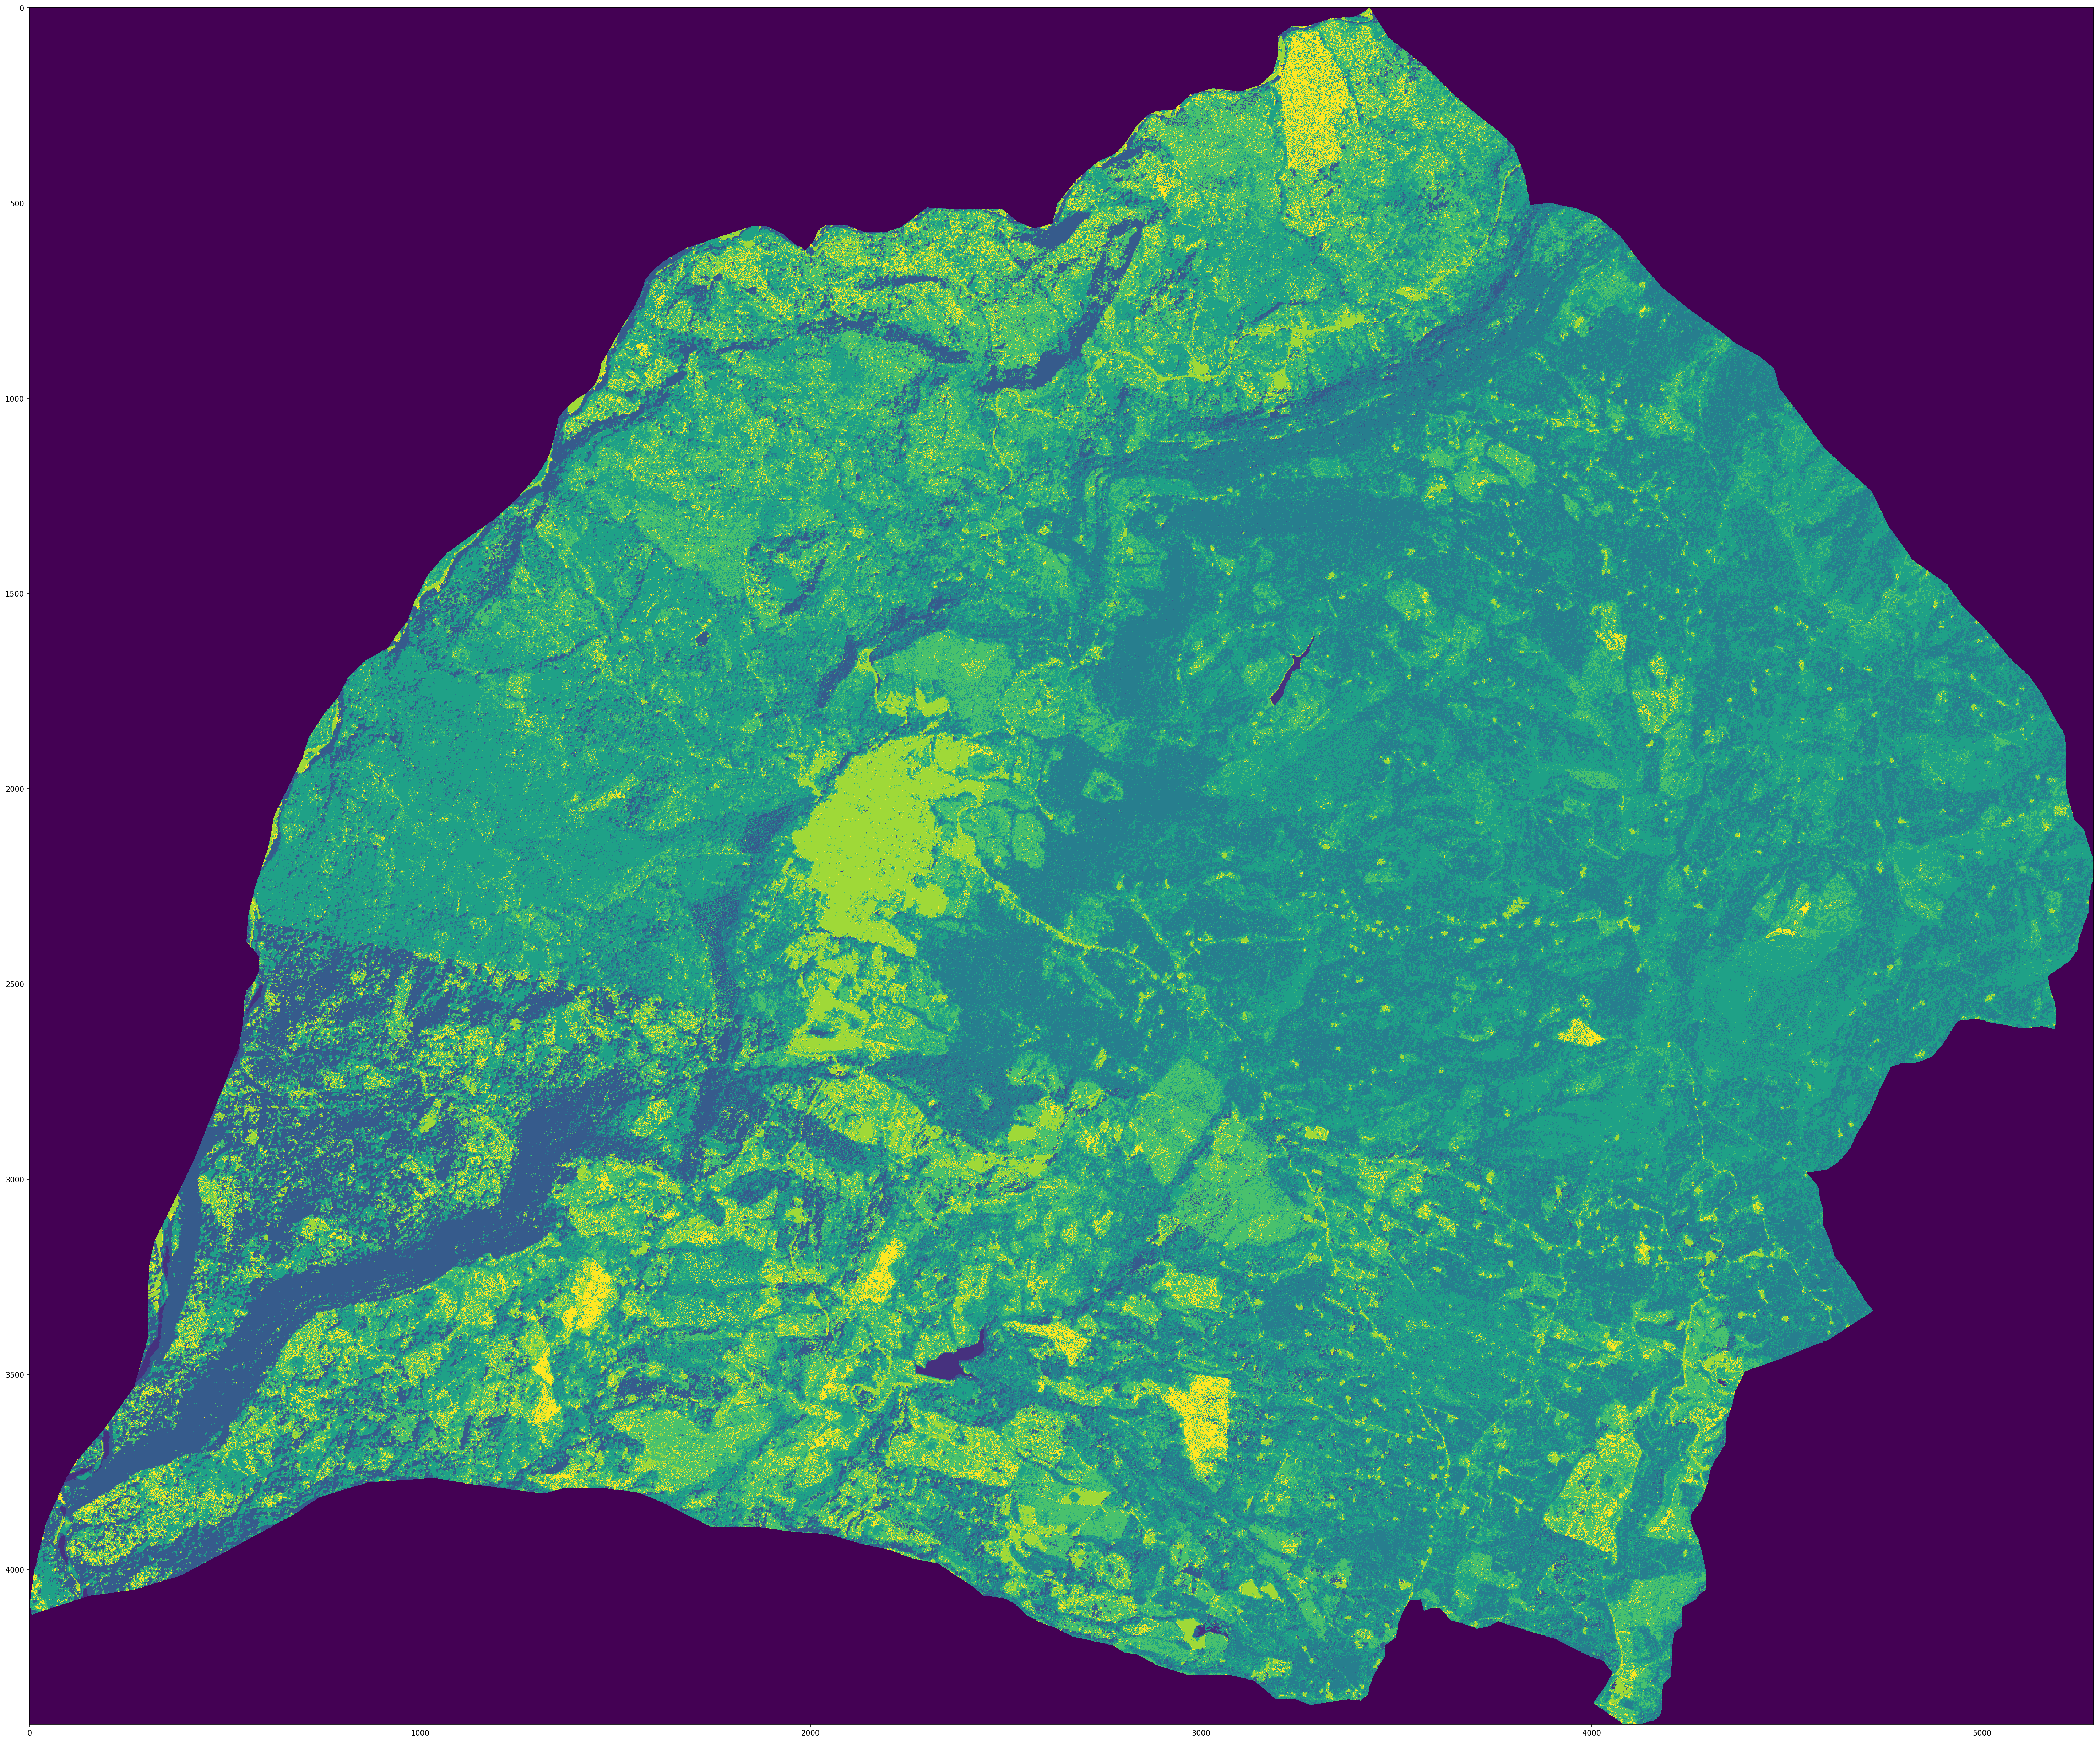

In [16]:
shape_image =  (4397, 5286)
img2 = clasification.reshape(shape_image[0],shape_image[1])
plt.rcParams["figure.figsize"] = (50,50)
plt.rcParams["figure.dpi"] = 150
show(img2)

In [31]:
infile = '/Users/oscar/Code/Maestria/perc_remota/taller_3/images/dos-reflectance.tif'
data   = gdal.Open(infile)
arr    = img2
print(data.GetGeoTransform())
# Do some processing....

# Save out to a GeoTiff

# First of all, gather some information from the original file
[cols,rows] = shape_image
trans       = data.GetGeoTransform()
proj        = data.GetProjection()
outfile     = '/Users/oscar/Code/Maestria/perc_remota/taller_3/images/classsification.tif'

# Create the file, using the information from the original file
outdriver = gdal.GetDriverByName("GTiff")
outdata   = outdriver.Create(str(outfile), rows, cols, 1, gdal.GDT_Float32)

# Write the array to the file, which is the original array in this example
outdata.GetRasterBand(1).WriteArray(arr)


# Set a no data value if required
outdata.GetRasterBand(1).SetNoDataValue(-1)


# Georeference the image
outdata.SetGeoTransform(trans)

# Write projection information
outdata.SetProjection(proj)
    

(685823.8206769581, 3.0, 0.0, 721674.9882582908, 0.0, -3.0)


0